# Exercise 2
Implement the standard brute-force factoring algorithm as efficiently as possible.  
Try only odd numbers (and 2) up to $\sqrt{a}$ (where a is the number you wish to factor).

In [ ]:
def get_primes1(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
        factors = {}
    return primes

def factorize(a, primes):
    for p in primes:
        if a % p == 0:
            e = 1
            while a % (p ** e) == 0:
                e += 1
            e -= 1
            factors[p] = e
            a = a / (p ** e)
    return factors

In [ ]:
# Given
a = 978460745

In [ ]:
primes = get_primes1(a)
factors = factorize(a, primes)
factors

# Exercise 3
Make improvements to your brute-force algorithm. For example, skipping  
multiples of 3, 5, 7, .... Discuss the speed improvements in doing so.

In [ ]:
def get_primes1(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    return primes

def get_primes2(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    for p in primes:
        mult = [n for n in primes if (n % p == 0) and (n != p)]
        for m in mult:
            primes.remove(m)
    return primes

def factorize(a, primes):
    factors = {}
    for p in primes:
        if a % p == 0:
            e = 1
            while a % (p ** e) == 0:
                e += 1
            e -= 1
            factors[p] = e
            a = a / (p ** e)
    return factors

In [ ]:
# Given
a = 978460745

In [ ]:
primes1 = get_primes1(a)

In [ ]:
factors = factorize(a, primes1)
factors

In [ ]:
primes2 = get_primes2(a)

In [ ]:
factors = factorize(a, primes2)
factors

In [1]:
import timeit

In [2]:
setup1 = """
def get_primes1(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    return primes

def get_primes2(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    for p in primes:
        mult = [n for n in primes if (n % p == 0) and (n != p)]
        for m in mult:
            primes.remove(m)
    return primes

def factorize(a, primes):
    factors = {}
    for p in primes:
        if a % p == 0:
            e = 1
            while a % (p ** e) == 0:
                e += 1
            e -= 1
            factors[p] = e
            a = a / (p ** e)
    return factors
a = 978460745
primes1 = get_primes1(a)
"""
code1 = """
factorize(a, primes1)
"""
print(timeit.timeit(setup=setup1,
                   stmt=code1,
                   number=1000))

0.8367405000000003


In [3]:
setup2 = """
def get_primes1(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    return primes

def get_primes2(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    for p in primes:
        mult = [n for n in primes if (n % p == 0) and (n != p)]
        for m in mult:
            primes.remove(m)
    return primes

def factorize(a, primes):
    factors = {}
    for p in primes:
        if a % p == 0:
            e = 1
            while a % (p ** e) == 0:
                e += 1
            e -= 1
            factors[p] = e
            a = a / (p ** e)
    return factors
a = 978460745
primes2 = get_primes2(a)
"""
code2 = """
factorize(a, primes2)
"""
print(timeit.timeit(setup=setup2,
                   stmt=code2,
                   number=1000))

0.18469720000000045


# Exercise 4
Implement Fermat’s difference of squares method. Discuss its  
performance (running times) with inputs of integers varying  
in size from small numbers (< 100) up through numbers in the  
billions and further.

In [16]:
import math
def check_square(num):
    num = int(num)
    root = math.sqrt(num)
    if int(root + 0.5) ** 2 == num:
        return True
    else:
        return False
    return None

def factorize_fermat(a):
    x = math.ceil(math.sqrt(a))
    t = 2 * x + 1
    d = x ** 2 - a
    while not(check_square(d)):
        d += t
        t += 2
    x = math.sqrt(d + a)
    y = math.sqrt(d)
    return x, y

In [4]:
a = 978460745

In [17]:
x, y = factorize_fermat(a)

In [36]:
setup = """
import math
def check_square(num):
    num = int(num)
    root = math.sqrt(num)
    if int(root + 0.5) ** 2 == num:
        return True
    else:
        return False
    return None

def factorize_fermat(a):
    x = math.ceil(math.sqrt(a))
    t = 2 * x + 1
    d = x ** 2 - a
    while not(check_square(d)):
        d += t
        t += 2
    x = math.sqrt(d + a)
    y = math.sqrt(d)
    return x, y
from __main__ import a
"""
code = """
x, y = factorize_fermat(a)
"""
A, Time = [], []
a0 = 50
for i in range(10):
    a0 = a0 * 10
    A.append(a0)
for a in A:
    t = timeit.timeit(setup=setup, stmt=code, number=1000)
    print(a, t)
    Time.append(t)

500 0.007318499999655614
5000 0.005327399999714544
50000 0.0023135999999794876
500000 0.03215460000001258
5000000 0.011076999999659165
50000000 0.03966500000024098
500000000 0.10116169999992053
5000000000 0.38157419999970443
50000000000 0.9938281999998253
500000000000 2.575955899999826


In [33]:
from matplotlib import pyplot as plt

In [37]:
Time

[0.007318499999655614,
 0.005327399999714544,
 0.0023135999999794876,
 0.03215460000001258,
 0.011076999999659165,
 0.03966500000024098,
 0.10116169999992053,
 0.38157419999970443,
 0.9938281999998253,
 2.575955899999826]

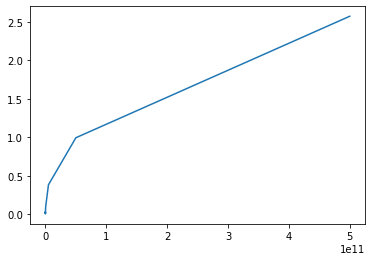

In [38]:
plt.plot(A, Time)

# Exercise 5
Implement Pollard's p-1 factorization algorithm

In [75]:
import math
from random import randint

In [88]:
def get_primes(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    for p in primes:
        mult = [n for n in primes if (n % p == 0) and (n != p)]
        for m in mult:
            primes.remove(m)
    return primes

def find_gcd(lst):
    from math import gcd
    from functools import reduce
    x = reduce(gcd, lst)
    return x

def exponentiate_sam(x, d, n):
    d_bin = list(bin(d)[2:])
    t = len(d_bin) - 1
    r = x
    for i in range(t-1, -1, -1):
        r = (r * r) % n
        if int(d_bin[t-i]) == 1:
            r = (r * x) % n
    return r

def pollard_pm1(a, B):
    b = 2
    primes = get_primes(B ** 2)
    for i, pi in enumerate(primes):
        e = math.floor(math.log(B, 10) / math.log(pi, 10))
        f = pi ** e
        b = exponentiate_sam(b, f, a)
    g = find_gcd([b - 1, a])
    if (g>1) and (g<a):
        return g
    else:
        print("Method failed!")
        return None
    return None

def pollard_pm1_charest(n, B):
    primes = get_primes(B ** 2)
    m = 1
    for i, p in enumerate(primes):
        exp = math.floor(math.log(B, 10) / math.log(p, 10))
        m = m * (p ** exp)
    a = randint(1, n)
    d = find_gcd([a, n])
    e = None
    while True:
        if d==1:
            print("d = 1")
            w = exponentiate_sam(a, m, n)
            e = find_gcd(w - 1, n)
            if (e!=1) and (e!=n):
                return e
            elif e==n:
                print("e = n; repeating with new random values of 'a'")
                a = randint(1, n)
                d = find_gcd([a, n])
            else:
                print("Method failed. Increase B!")
                e = None
                break
        else:
            return d
    return e

In [96]:
# Given
a = 100
B = 10

In [97]:
factor = pollard_pm1(a, B)
factor

25

# Exercise 6
Building on the elliptic curve point addition used in the previous chapter,  
implement elliptic curve factorization (ECF).  
Next, provide a chart to compare the performance of Pollard’s p – 1 and ECF for  
the same inputs (with the same, or similar, parameters).

In [11]:
import math
from random import randint

In [122]:
def get_primes(a):
    import math
    primes = [2]
    for n in range(3, math.ceil(math.sqrt(a))):
        if n % 2 == 1:
            primes.append(n)
    for p in primes:
        mult = [n for n in primes if (n % p == 0) and (n != p)]
        for m in mult:
            primes.remove(m)
    return primes

def find_gcd(lst):
    from math import gcd
    from functools import reduce
    x = reduce(gcd, lst)
    return x

def inverse_eea(a, b):
    if b==0:
        v = 0
        return v
    else:
        import math
        u, d = 1, a
        v1, v3 = 0, b
        while v3 != 0:
            q, t3 = math.floor(d / v3), d % v3
            t1 = u - q * v1
            u = v1
            d = v3
            v1 = t1
            v3 = t3
        v = (d - a * u) / b
        return v

def point_addition_ec_factorize(p, curve, P, Q):
    import math
    a, b = curve['a'], curve['b']
    (x1, y1), (x2, y2) = P, Q
    if (x1 % p == x2 % p) and (y1 % p == -y2 % p):
        print("P + (-P) = inf")
        x3 = x1
        y3 = float("inf")
        den_m = (x2 - x1) % p
        g = find_gcd([int(p), int(den_m)])
        print("gcd(denominator, n) = {}".format(g))
        return (x3, y3)
    elif (math.isinf(y1)) and not(math.isinf(y2)):
        return (x2, y2)
    elif (math.isinf(y2)) and not(math.isinf(y1)):
        return (x1, y1)
    elif (math.isinf(y1)) and (math.isinf(y2)):
        return (x1, y1)
    elif (x1 % p == x2 % p) and (y1 % p == y2 % p):
        print("Point doubling: 2P")
        num_m = (3 * x1 ** 2 + a) % p
        den_m = (2 * y1) % p
        g = find_gcd([int(p), int(den_m)])
        print("gcd(denominator, n) = {}".format(g))
        m = (num_m * inverse_eea(p, den_m)) % p
    else:
        print("Regular point addition")
        num_m = (y2 - y1) % p
        den_m = (x2 - x1) % p
        g = find_gcd([int(p), int(den_m)])
        print("gcd(denominator, n) = {}".format(g))
        m = (num_m * inverse_eea(p, den_m)) % p
    x3 = (m ** 2 - x2 - x1) % p
    y3 = (m * (x1 - x3) - y1) % p
    return (x3, y3)

def point_multiplication_ec_factorize(p, curve, P, d):
    d_bin = list(bin(d)[2:])
    d_bin.reverse()
    t = len(d_bin)
    T = P
    for i in range(t-2, -1, -1):
        T = point_addition_ec(p, curve, T, T)
        if int(d_bin[i]) == 1:
            T = point_addition_ec(p, curve, T, P)
    return T

def exponentiate_sam(x, d, n):
    d_bin = list(bin(d)[2:])
    t = len(d_bin) - 1
    r = x
    for i in range(t-1, -1, -1):
        r = (r * r) % n
        if int(d_bin[t-i]) == 1:
            r = (r * x) % n
    return r

In [123]:
# Given
n = 100
B = 10

In [124]:
primes = get_primes(B ** 2)
primes

[2, 3, 5, 7]

In [125]:
while True:
    a, x, y = randint(1, n), randint(1, n), randint(1, n)
    b = (y ** 2 - x ** 3 - a * x) % n
    if find_gcd([(4 * a ** 3 + 27 * b ** 2) % n, n]) != 1:
        break
print("EC: x^3 + {}x + {}; P -> ({}, {})".format(a, b, x, y))
curve = {"a": a, "b": b}
P = (x, y)
for p in primes:
    e = math.ceil(math.log(B) / math.log(p))
    k = exponentiate_sam(p, e, n)
    P = point_multiplication_ec_factorize(n, curve, P, k)

EC: x^3 + 11x + 4; P -> (45, 82)
Point doubling: 2P
Point doubling: 2P
Point doubling: 2P
Point doubling: 2P
Point doubling: 2P
Regular point addition
Point doubling: 2P
Point doubling: 2P
Regular point addition
Point doubling: 2P
Regular point addition
Point doubling: 2P
Regular point addition
Point doubling: 2P
Point doubling: 2P
Point doubling: 2P
Regular point addition
Point doubling: 2P
Regular point addition
Point doubling: 2P
Point doubling: 2P
Point doubling: 2P
Point doubling: 2P
Regular point addition
